In [1]:

# Default locations if parameter not passed
benchmark_data_path = "big_matrix.pkl"


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from rich import print as rprint
import seaborn as sns
import os
from scipy.stats import bootstrap

benchmark_data = pickle.load(open(benchmark_data_path, "rb"))

df = pd.DataFrame(benchmark_data["dataframe"])


rprint(df.columns)
rprint(df.head())
rprint(df.tail())

Index(['name', 'full_output', 'simu_rr', 'node_count', 'hosts',
       'biggest_matrix', 'time'],
      dtype='object')

name                                        full_output  \
0             big-matrix                                                NaN   
1  simulator-matrix-feed  Time Simulation (microseconds) : 8296 \nDistan...   
2  simulator-matrix-feed  Time Simulation (microseconds) : 8269 \nDistan...   
3  simulator-matrix-feed  Time Simulation (microseconds) : 8256 \nDistan...   

   simu_rr  node_count                                            hosts  \
0      NaN         4.0  sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4   
1      2.0         NaN  sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4   
2      3.0         NaN  sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4   
3      4.0         NaN  sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4   

   biggest_matrix       time  
0             NaN  55.202698  
1             4.0   0.577929  
2             4.0   0.585575  
3             4.0   0.595208

name                                        full_output  \
0             big-matrix                                                NaN   
1  simulator-matrix-feed  Time Simulation (microseconds) : 8296 \nDistan...   
2  simulator-matrix-feed  Time Simulation (microseconds) : 8269 \nDistan...   
3  simulator-matrix-feed  Time Simulation (microseconds) : 8256 \nDistan...   

   simu_rr  node_count                                            hosts  \
0      NaN         4.0  sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4   
1      2.0         NaN  sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4   
2      3.0         NaN  sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4   
3      4.0         NaN  sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4   

   biggest_matrix       time  
0             NaN  55.202698  
1             4.0   0.577929  
2             4.0   0.585575  
3             4.0   0.595208

In [3]:
sns.set_theme()

colors = [
    "#7f7f7f",  # grey
    "#621dac",  # main purple
    "#c5702d",  # orange
    "#000000",  # black,
    "#099892",  # teal
    "#ffd400",  # yellow
    "#7e57c4",  # pink/purple,
]
colors_backup = colors.copy()

In [4]:
def calculate_bootstrap_error(data):
    n_runs = benchmark_data["config"].metadata.runs
    if n_runs < 2:
        return 0
    res = bootstrap(
        (data,), np.mean, confidence_level=0.95, n_resamples=1000, method="basic"
    )
    return res.standard_error

In [5]:
bench_names = df["name"].unique()
run_metadata = benchmark_data["config"].applications

max_node_count = 0

for bench in bench_names:
    bench_metadata = run_metadata[bench]
    n_runs = benchmark_data["config"].metadata.runs
    print(f"Benchmark: {bench} - Runs: {n_runs}")
    # print(bench_metadata)
    df_bench = df[df["name"] == bench]
    for idx, row in df_bench.iterrows():
        print(f"--- Row {idx} ---")
        if "node_count" in row:
            node_count = row["node_count"]
            if node_count > max_node_count:
                max_node_count = node_count
        for col, val in row.items():
            print(f"{col}: {val}")   # printing val directly never truncates
        print()

max_node_count = int(max_node_count)
print(f"Max node count: {max_node_count}")

Benchmark: big-matrix - Runs: 1
--- Row 0 ---
name: big-matrix
full_output: nan
simu_rr: nan
node_count: 4.0
hosts: sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4
biggest_matrix: nan
time: 55.2026980118826

Benchmark: simulator-matrix-feed - Runs: 1
--- Row 1 ---
name: simulator-matrix-feed
full_output: Time Simulation (microseconds) : 8296 
Distance : 0.387802


simu_rr: 2.0
node_count: nan
hosts: sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4
biggest_matrix: 4.0
time: 0.5779287228360772

--- Row 2 ---
name: simulator-matrix-feed
full_output: Time Simulation (microseconds) : 8269 
Distance : 0.387262


simu_rr: 3.0
node_count: nan
hosts: sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4
biggest_matrix: 4.0
time: 0.585575289092958

--- Row 3 ---
name: simulator-matrix-feed
full_output: Time Simulation (microseconds) : 8256 
Distance : 0.403614


simu_rr: 4.0
node_count: nan
hosts: sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4
biggest_matrix: 4.0
time: 0.595207731006667

Max node coun

# Experiment 1
x-axis: SIM_RR
y_axis: distance 

In [6]:
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def extract_distance(text):
    matches = re.findall(
        r"Distance\s*:\s*([-+]?(?:\d*\.\d+|\d+)(?:[eE][-+]?\d+)?)",
        str(text)
    )
    return float(matches[-1]) if matches else np.nan

In [7]:
df_dist = df[df["name"] == "simulator-matrix-feed"].copy()
df_dist["distance"] = df_dist["full_output"].apply(extract_distance)
df_dist = df_dist[["simu_rr", "distance"]]

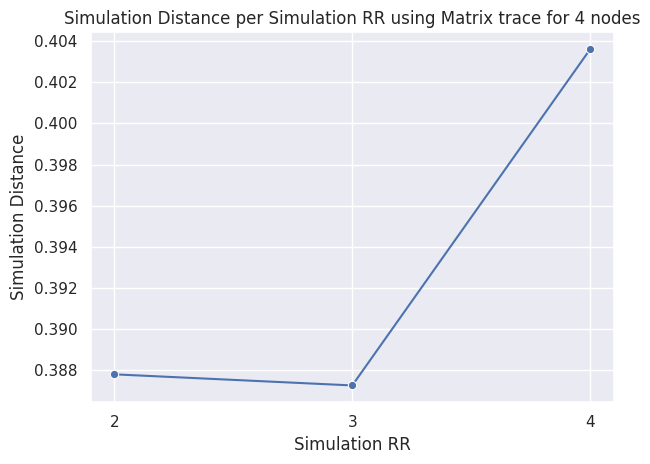

In [8]:
plt.figure()
sns.lineplot(
  data=df_dist,
  x="simu_rr",
  y="distance",
  marker="o",
  errorbar="ci",
)

plt.xlabel("Simulation RR")
plt.ylabel("Simulation Distance")
plt.title(f"Simulation Distance per Simulation RR using Matrix trace for {max_node_count} nodes")
plt.grid(True)
plt.xticks(sorted(df_dist["simu_rr"].unique()))
plt.tight_layout()
plt.show()